In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from sklearn.impute import SimpleImputer
from mplsoccer import PyPizza, add_image
from scipy import stats
import math



In [2]:
#read in the data
df = pd.read_csv('radars.csv')
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [3]:
df.count()

Rk         505
Player     505
Nation     505
Pos        505
Squad      505
Age        505
Born       505
90s        505
Gls        505
Sh         505
SoT        505
SoT%       415
Sh/90      505
SoT/90     505
G/Sh       415
G/SoT      338
Dist       415
FK         505
PK         505
PKatt      505
xG         505
npxG       505
npxG/Sh    415
G-xG       505
np:G-xG    505
Matches    505
dtype: int64

In [4]:
df['Squad'].value_counts()

West Brom          30
Southampton        29
Arsenal            28
Liverpool          28
Newcastle Utd      27
Chelsea            27
Everton            26
Brighton           26
Leicester City     25
Wolves             25
Manchester Utd     25
Fulham             25
Tottenham          24
Burnley            24
West Ham           24
Sheffield Utd      24
Manchester City    23
Leeds United       22
Crystal Palace     22
Aston Villa        21
Name: Squad, dtype: int64

In [5]:
df['Nation'].unique()

array(['nl NED', 'eng ENG', 'es ESP', 'ar ARG', 'ng NGA', 'fr FRA',
       'be BEL', 'is ISL', 'mk MKD', 'br BRA', 'py PAR', 'co COL',
       'gh GHA', 'wal WAL', 'dk DEN', 'sco SCO', 'ga GAB', 'ci CIV',
       'pl POL', 'dz ALG', 'no NOR', 'ml MLI', 'ie IRL', 'pt POR',
       'uy URU', 'cz CZE', 'it ITA', 'nir NIR', 'sn SEN', 'sk SVK',
       'eg EGY', 'at AUT', 'de GER', 'jm JAM', 'kr KOR', 'rs SRB',
       'ir IRN', 'ch SUI', 'mx MEX', 'tr TUR', 'cd COD', 'gn GUI',
       'ba BIH', 'hr CRO', 'se SWE', 'cm CMR', 'jp JPN', 'zw ZIM',
       'us USA', 'au AUS', 'ma MAR', 'kn SKN', 'za RSA', 'bf BFA',
       'gr GRE', 'nz NZL', 'ua UKR'], dtype=object)

In [6]:
df['Nation'].nunique()

57

In [7]:
df['Nation'].value_counts()

eng ENG    181
fr FRA      31
es ESP      26
br BRA      26
ie IRL      21
sco SCO     19
pt POR      19
nl NED      15
be BEL      11
wal WAL     11
de GER       9
ar ARG       8
ng NGA       7
dk DEN       6
ci CIV       6
us USA       6
nir NIR      5
eg EGY       5
pl POL       5
it ITA       5
gh GHA       5
tr TUR       5
ch SUI       5
se SWE       4
rs SRB       4
sn SEN       4
co COL       4
no NOR       3
cz CZE       3
au AUS       3
jm JAM       3
is ISL       3
dz ALG       3
jp JPN       2
sk SVK       2
ma MAR       2
ua UKR       2
hr CRO       2
cd COD       2
ml MLI       2
ga GAB       2
py PAR       2
cm CMR       2
mx MEX       1
zw ZIM       1
bf BFA       1
gr GRE       1
kn SKN       1
za RSA       1
uy URU       1
ba BIH       1
nz NZL       1
mk MKD       1
gn GUI       1
ir IRN       1
kr KOR       1
at AUT       1
Name: Nation, dtype: int64

In [8]:
df['Pos'].value_counts()

DF      172
MF      106
FW       81
FWMF     41
GK       37
MFFW     30
MFDF     12
DFMF     12
FWDF      9
DFFW      5
Name: Pos, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       505 non-null    int64  
 1   Player   505 non-null    object 
 2   Nation   505 non-null    object 
 3   Pos      505 non-null    object 
 4   Squad    505 non-null    object 
 5   Age      505 non-null    object 
 6   Born     505 non-null    int64  
 7   90s      505 non-null    float64
 8   Gls      505 non-null    int64  
 9   Sh       505 non-null    int64  
 10  SoT      505 non-null    int64  
 11  SoT%     415 non-null    float64
 12  Sh/90    505 non-null    float64
 13  SoT/90   505 non-null    float64
 14  G/Sh     415 non-null    float64
 15  G/SoT    338 non-null    float64
 16  Dist     415 non-null    float64
 17  FK       505 non-null    int64  
 18  PK       505 non-null    int64  
 19  PKatt    505 non-null    int64  
 20  xG       505 non-null    float64
 21  npxG     505 non

In [10]:
len(df)

505

In [11]:
df.describe()

,Rk,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,415.000000,505.000000,505.000000,415.000000,338.000000,415.000000,505.000000,505.000000,505.000000,505.000000,505.000000,415.000000,505.000000,505.000000
mean,253.000000,1993.908911,11.217822,1.310891,11.912871,4.116832,31.113253,1.099426,0.333505,0.082627,0.248728,17.013012,0.471287,0.146535,0.178218,1.318812,1.185347,0.086482,-0.007921,-0.020990
std,145.925209,4.202656,8.076612,2.459267,14.694114,5.931840,21.903888,1.215934,0.410757,0.133504,0.261978,5.767573,1.539064,0.688852,0.796770,2.233036,1.905772,0.051916,1.044514,1.016371
min,1.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,-5.300000,-5.000000
25%,127.000000,1991.000000,3.500000,0.000000,1.000000,0.000000,18.050000,0.270000,0.000000,0.000000,0.000000,12.450000,0.000000,0.000000,0.000000,0.100000,0.100000,0.050000,-0.400000,-0.400000
50%,253.000000,1994.000000,10.600000,0.000000,7.000000,2.000000,32.400000,0.740000,0.180000,0.030000,0.225000,17.000000,0.000000,0.000000,0.000000,0.400000,0.400000,0.080000,0.000000,0.000000
75%,379.000000,1997.000000,18.200000,1.000000,16.000000,5.000000,42.900000,1.680000,0.520000,0.130000,0.400000,21.000000,0.000000,0.000000,0.000000,1.400000,1.300000,0.110000,0.300000,0.300000
max,505.000000,2004.000000,26.000000,17.000000,85.000000,35.000000,100.000000,12.860000,2.810000,1.000000,1.000000,42.100000,13.000000,7.000000,8.000000,14.600000,12.000000,0.360000,5.500000,5.500000


In [12]:
df.isnull()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

Rk           0
Player       0
Nation       0
Pos          0
Squad        0
Age          0
Born         0
90s          0
Gls          0
Sh           0
SoT          0
SoT%        90
Sh/90        0
SoT/90       0
G/Sh        90
G/SoT      167
Dist        90
FK           0
PK           0
PKatt        0
xG           0
npxG         0
npxG/Sh     90
G-xG         0
np:G-xG      0
Matches      0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

Rk         0
Player     0
Nation     0
Pos        0
Squad      0
Age        0
Born       0
90s        0
Gls        0
Sh         0
SoT        0
SoT%       0
Sh/90      0
SoT/90     0
G/Sh       0
G/SoT      0
Dist       0
FK         0
PK         0
PKatt      0
xG         0
npxG       0
npxG/Sh    0
G-xG       0
np:G-xG    0
Matches    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.rename(columns = {'Squad':'Club'}, inplace = True)
df.head()

,Rk,Player,Nation,Pos,Club,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
5,6,Sergio Agüero\Sergio-Aguero,ar ARG,FW,Manchester City,32-273,1988,2.3,0,4,...,8.4,0,0,0,0.6,0.6,0.16,-0.6,-0.6,Matches


In [18]:
df['npxG/Sh'].unique()

array([0.05, 0.18, 0.13, 0.06, 0.16, 0.07, 0.04, 0.03, 0.09, 0.1 , 0.12,
       0.2 , 0.15, 0.08, 0.14, 0.11, 0.26, 0.29, 0.19, 0.23, 0.34, 0.17,
       0.36, 0.33, 0.02, 0.27, 0.21, 0.01])

In [19]:
df[['year','days']] = df.Age.str.split("-",expand=True,)
df

,Rk,Player,Nation,Pos,Club,Age,Born,90s,Gls,Sh,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,year,days
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches,30,185
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,0,0,5.6,5.6,0.18,0.4,0.4,Matches,23,151
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches,24,232
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches,23,159
5,6,Sergio Agüero\Sergio-Aguero,ar ARG,FW,Manchester City,32-273,1988,2.3,0,4,...,0,0,0.6,0.6,0.16,-0.6,-0.6,Matches,32,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,Wilfried Zaha\Wilfried-Zaha,ci CIV,FW,Crystal Palace,28-112,1992,18.5,9,43,...,2,2,6.0,4.5,0.10,3.0,2.5,Matches,28,112
499,500,Andre-Frank Zambo Anguissa\Andre-Frank-Zambo-A...,cm CMR,MF,Fulham,25-106,1995,20.9,0,23,...,0,0,1.2,1.2,0.05,-1.2,-1.2,Matches,25,106
501,502,Oleksandr Zinchenko\Oleksandr-Zinchenko,ua UKR,DF,Manchester City,24-077,1996,10.1,0,8,...,0,0,0.4,0.4,0.06,-0.4,-0.4,Matches,24,077
502,503,Hakim Ziyech\Hakim-Ziyech,ma MAR,FWMF,Chelsea,27-348,1993,8.0,1,22,...,0,0,1.0,1.0,0.05,0.0,0.0,Matches,27,348


In [20]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
df.head()

,Rk,Player,Nation,Pos,Club,Age,Born,90s,Gls,Sh,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,year,days
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches,30,185
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,0,0,5.6,5.6,0.18,0.4,0.4,Matches,23,151
2,3,Che Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches,24,232
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches,23,159
5,6,Sergio Agüero,ar ARG,FW,Manchester City,32-273,1988,2.3,0,4,...,0,0,0.6,0.6,0.16,-0.6,-0.6,Matches,32,273


In [21]:
df['Age'] = df['Age'].str.split('-',expand=True)[0]
df.head()

,Rk,Player,Nation,Pos,Club,Age,Born,90s,Gls,Sh,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,year,days
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30,1990,13.7,0,15,...,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches,30,185
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23,1997,11.3,6,31,...,0,0,5.6,5.6,0.18,0.4,0.4,Matches,23,151
2,3,Che Adams,eng ENG,FW,Southampton,24,1996,21.2,4,40,...,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches,24,232
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23,1997,22.0,0,17,...,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches,23,159
5,6,Sergio Agüero,ar ARG,FW,Manchester City,32,1988,2.3,0,4,...,0,0,0.6,0.6,0.16,-0.6,-0.6,Matches,32,273


In [22]:
print(df[['Player', 'xG', 'Gls']])

                         Player   xG  Gls
0           Patrick van Aanholt  0.8    0
1                 Tammy Abraham  5.6    6
2                     Che Adams  5.3    4
3              Tosin Adarabioyo  0.9    0
5                 Sergio Agüero  0.6    0
..                          ...  ...  ...
498               Wilfried Zaha  6.0    9
499  Andre-Frank Zambo Anguissa  1.2    0
501         Oleksandr Zinchenko  0.4    0
502                Hakim Ziyech  1.0    1
503                  Kurt Zouma  1.0    4

[338 rows x 3 columns]


In [23]:
df.loc[df['Club'] == "Arsenal"]

,Rk,Player,Nation,Pos,Club,Age,Born,90s,Gls,Sh,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,year,days
31,32,Pierre-Emerick Aubameyang,ga GAB,FW,Arsenal,31,1989,19.6,8,44,...,2,2,8.2,6.7,0.15,-0.2,-0.7,Matches,31,257
52,53,Héctor Bellerín,es ESP,DF,Arsenal,25,1995,21.2,1,11,...,0,0,0.6,0.6,0.05,0.4,0.4,Matches,25,348
126,127,Gabriel Dos Santos,br BRA,DF,Arsenal,23,1997,14.2,2,11,...,0,0,0.8,0.8,0.07,1.2,1.2,Matches,23,073
136,137,Mohamed Elneny,eg EGY,MF,Arsenal,28,1992,11.9,0,6,...,0,0,0.5,0.5,0.09,-0.5,-0.5,Matches,28,234
193,194,Rob Holding,eng ENG,DF,Arsenal,25,1995,20.4,0,14,...,0,0,1.1,1.1,0.08,-1.1,-1.1,Matches,25,163
240,241,Alexandre Lacazette,fr FRA,FW,Arsenal,29,1991,15.7,9,29,...,2,2,6.8,5.3,0.18,2.2,1.7,Matches,29,278
273,274,Ainsley Maitland-Niles,eng ENG,DF,Arsenal,23,1997,5.4,0,2,...,0,0,0.1,0.1,0.06,-0.1,-0.1,Matches,23,185
282,283,Martinelli,br BRA,FW,Arsenal,19,2001,2.3,0,7,...,0,0,0.8,0.8,0.11,-0.8,-0.8,Matches,19,257
327,328,Eddie Nketiah,eng ENG,FW,Arsenal,21,1999,3.6,1,7,...,0,0,1.2,1.2,0.17,-0.2,-0.2,Matches,21,276
344,345,Thomas Partey,gh GHA,MF,Arsenal,27,1993,7.8,0,11,...,0,0,0.6,0.6,0.06,-0.6,-0.6,Matches,27,262


In [24]:
fw = df.loc[df['Pos'] == "FW"]
fw

,Rk,Player,Nation,Pos,Club,Age,Born,90s,Gls,Sh,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,year,days
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23,1997,11.3,6,31,...,0,0,5.6,5.6,0.18,0.4,0.4,Matches,23,151
2,3,Che Adams,eng ENG,FW,Southampton,24,1996,21.2,4,40,...,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches,24,232
5,6,Sergio Agüero,ar ARG,FW,Manchester City,32,1988,2.3,0,4,...,0,0,0.6,0.6,0.16,-0.6,-0.6,Matches,32,273
27,28,Michail Antonio,eng ENG,FW,West Ham,30,1990,13.8,7,42,...,0,0,8.1,8.1,0.20,-1.1,-1.1,Matches,30,339
31,32,Pierre-Emerick Aubameyang,ga GAB,FW,Arsenal,31,1989,19.6,8,44,...,2,2,8.2,6.7,0.15,-0.2,-0.7,Matches,31,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,Danny Welbeck,eng ENG,FW,Brighton,30,1990,8.2,2,19,...,0,1,4.4,3.6,0.19,-2.4,-1.6,Matches,30,096
481,482,Timo Werner,de GER,FW,Chelsea,24,1996,20.5,5,55,...,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches,24,361
491,492,Callum Wilson,eng ENG,FW,Newcastle Utd,29,1992,20.1,10,36,...,4,4,9.5,6.5,0.18,0.5,-0.5,Matches,29,003
493,494,Chris Wood,nz NZL,FW,Burnley,29,1991,18.9,4,31,...,0,0,6.1,6.1,0.20,-2.1,-2.1,Matches,29,085


In [25]:
print(fw[['Player', 'xG', 'Gls']])

                        Player   xG  Gls
1                Tammy Abraham  5.6    6
2                    Che Adams  5.3    4
5                Sergio Agüero  0.6    0
27             Michail Antonio  8.1    7
31   Pierre-Emerick Aubameyang  8.2    8
..                         ...  ...  ...
480              Danny Welbeck  4.4    2
481                Timo Werner  8.4    5
491              Callum Wilson  9.5   10
493                 Chris Wood  6.1    4
498              Wilfried Zaha  6.0    9

[63 rows x 3 columns]


In [26]:
fw_sort = fw.sort_values(['Gls', 'xG'], ascending=[0, 1])
fw_sort

,Rk,Player,Nation,Pos,Club,Age,Born,90s,Gls,Sh,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,year,days
398,399,Mohamed Salah,eg EGY,FW,Liverpool,28,1992,23.4,17,73,...,6,6,13.7,9.2,0.13,3.3,1.8,Matches,28,260
221,222,Harry Kane,eng ENG,FW,Tottenham,27,1993,22.4,14,85,...,3,3,11.8,9.6,0.11,2.2,1.4,Matches,27,217
191,192,Son Heung-min,kr KOR,FW,Tottenham,28,1992,23.9,13,47,...,0,0,7.5,7.5,0.16,5.5,5.5,Matches,28,237
78,79,Dominic Calvert-Lewin,eng ENG,FW,Everton,23,1997,20.9,13,55,...,0,0,10.4,10.4,0.19,2.6,2.6,Matches,23,351
41,42,Patrick Bamford,eng ENG,FW,Leeds United,27,1993,24.8,13,83,...,1,1,12.7,12.0,0.14,0.3,0.0,Matches,27,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,283,Martinelli,br BRA,FW,Arsenal,19,2001,2.3,0,7,...,0,0,0.8,0.8,0.11,-0.8,-0.8,Matches,19,257
339,340,Divock Origi,be BEL,FW,Liverpool,25,1995,2.1,0,7,...,0,0,0.9,0.9,0.13,-0.9,-0.9,Matches,25,318
67,68,Rhian Brewster,eng ENG,FW,Sheffield Utd,20,2000,8.2,0,14,...,0,0,1.3,1.3,0.09,-1.3,-1.3,Matches,20,335
469,470,Matěj Vydra,cz CZE,FW,Burnley,28,1992,7.0,0,16,...,0,0,2.0,2.0,0.12,-2.0,-2.0,Matches,28,305


In [27]:
print(fw_sort[['Player', 'xG', 'Gls']])

                    Player    xG  Gls
398          Mohamed Salah  13.7   17
221             Harry Kane  11.8   14
191          Son Heung-min   7.5   13
78   Dominic Calvert-Lewin  10.4   13
41         Patrick Bamford  12.7   13
..                     ...   ...  ...
282             Martinelli   0.8    0
339           Divock Origi   0.9    0
67          Rhian Brewster   1.3    0
469            Matěj Vydra   2.0    0
456              Trézéguet   2.7    0

[63 rows x 3 columns]


In [28]:
fw_ov_25 = df.loc[(df['Pos'] == 'FW') & (df['Age'] > '25') & (df["Gls"] > 10)]
fw_ov_25

,Rk,Player,Nation,Pos,Club,Age,Born,90s,Gls,Sh,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,year,days
41,42,Patrick Bamford,eng ENG,FW,Leeds United,27,1993,24.8,13,83,...,1,1,12.7,12.0,0.14,0.3,0.0,Matches,27,178
191,192,Son Heung-min,kr KOR,FW,Tottenham,28,1992,23.9,13,47,...,0,0,7.5,7.5,0.16,5.5,5.5,Matches,28,237
221,222,Harry Kane,eng ENG,FW,Tottenham,27,1993,22.4,14,85,...,3,3,11.8,9.6,0.11,2.2,1.4,Matches,27,217
398,399,Mohamed Salah,eg EGY,FW,Liverpool,28,1992,23.4,17,73,...,6,6,13.7,9.2,0.13,3.3,1.8,Matches,28,260
462,463,Jamie Vardy,eng ENG,FW,Leicester City,34,1987,19.7,12,48,...,6,7,14.6,9.3,0.19,-2.6,-3.3,Matches,34,050


In [29]:
df.groupby(['Club', 'Pos']).count()

Rk  Player  Nation  Age  Born  90s  Gls  Sh  SoT  SoT%  ...  PK  \
Club    Pos                                                           ...       
Arsenal DF     6       6       6    6     6    6    6   6    6     6  ...   6   
        FW     5       5       5    5     5    5    5   5    5     5  ...   5   
        FWDF   1       1       1    1     1    1    1   1    1     1  ...   1   
        FWMF   1       1       1    1     1    1    1   1    1     1  ...   1   
        MF     3       3       3    3     3    3    3   3    3     3  ...   3   
...           ..     ...     ...  ...   ...  ...  ...  ..  ...   ...  ...  ..   
Wolves  FW     3       3       3    3     3    3    3   3    3     3  ...   3   
        FWDF   1       1       1    1     1    1    1   1    1     1  ...   1   
        FWMF   2       2       2    2     2    2    2   2    2     2  ...   2   
        MF     3       3       3    3     3    3    3   3    3     3  ...   3   
        MFDF   1       1       1    1     1    1    1   1    1     1  ...   1   

              PKatt  xG  npxG  npxG/Sh  G-xG  np:G-xG  Matches  year  days  
Club    Pos                                                                 
Arsenal DF        6   6     6        6     6        6        6     6     6  
        FW        5   5     5        5     5        5        5     5     5  
        FWDF      1   1     1        1     1        1        1     1     1  
        FWMF      1   1     1        1     1        1        1     1     1  
        MF        3   3     3        3     3        3        3     3     3  
...             ...  ..   ...      ...   ...      ...      ...   ...   ...  
Wolves  FW        3   3     3        3     3        3        3     3     3  
        FWDF      1   1     1        1     1        1        1     1     1  
        FWMF      2   2     2        2     2        2        2     2     2  
        MF        3   3     3        3     3        3        3     3     3  
        MFDF      1   1     1        1     1        1        1     1     1  

[114 rows x 26 columns]

63
110
0
78


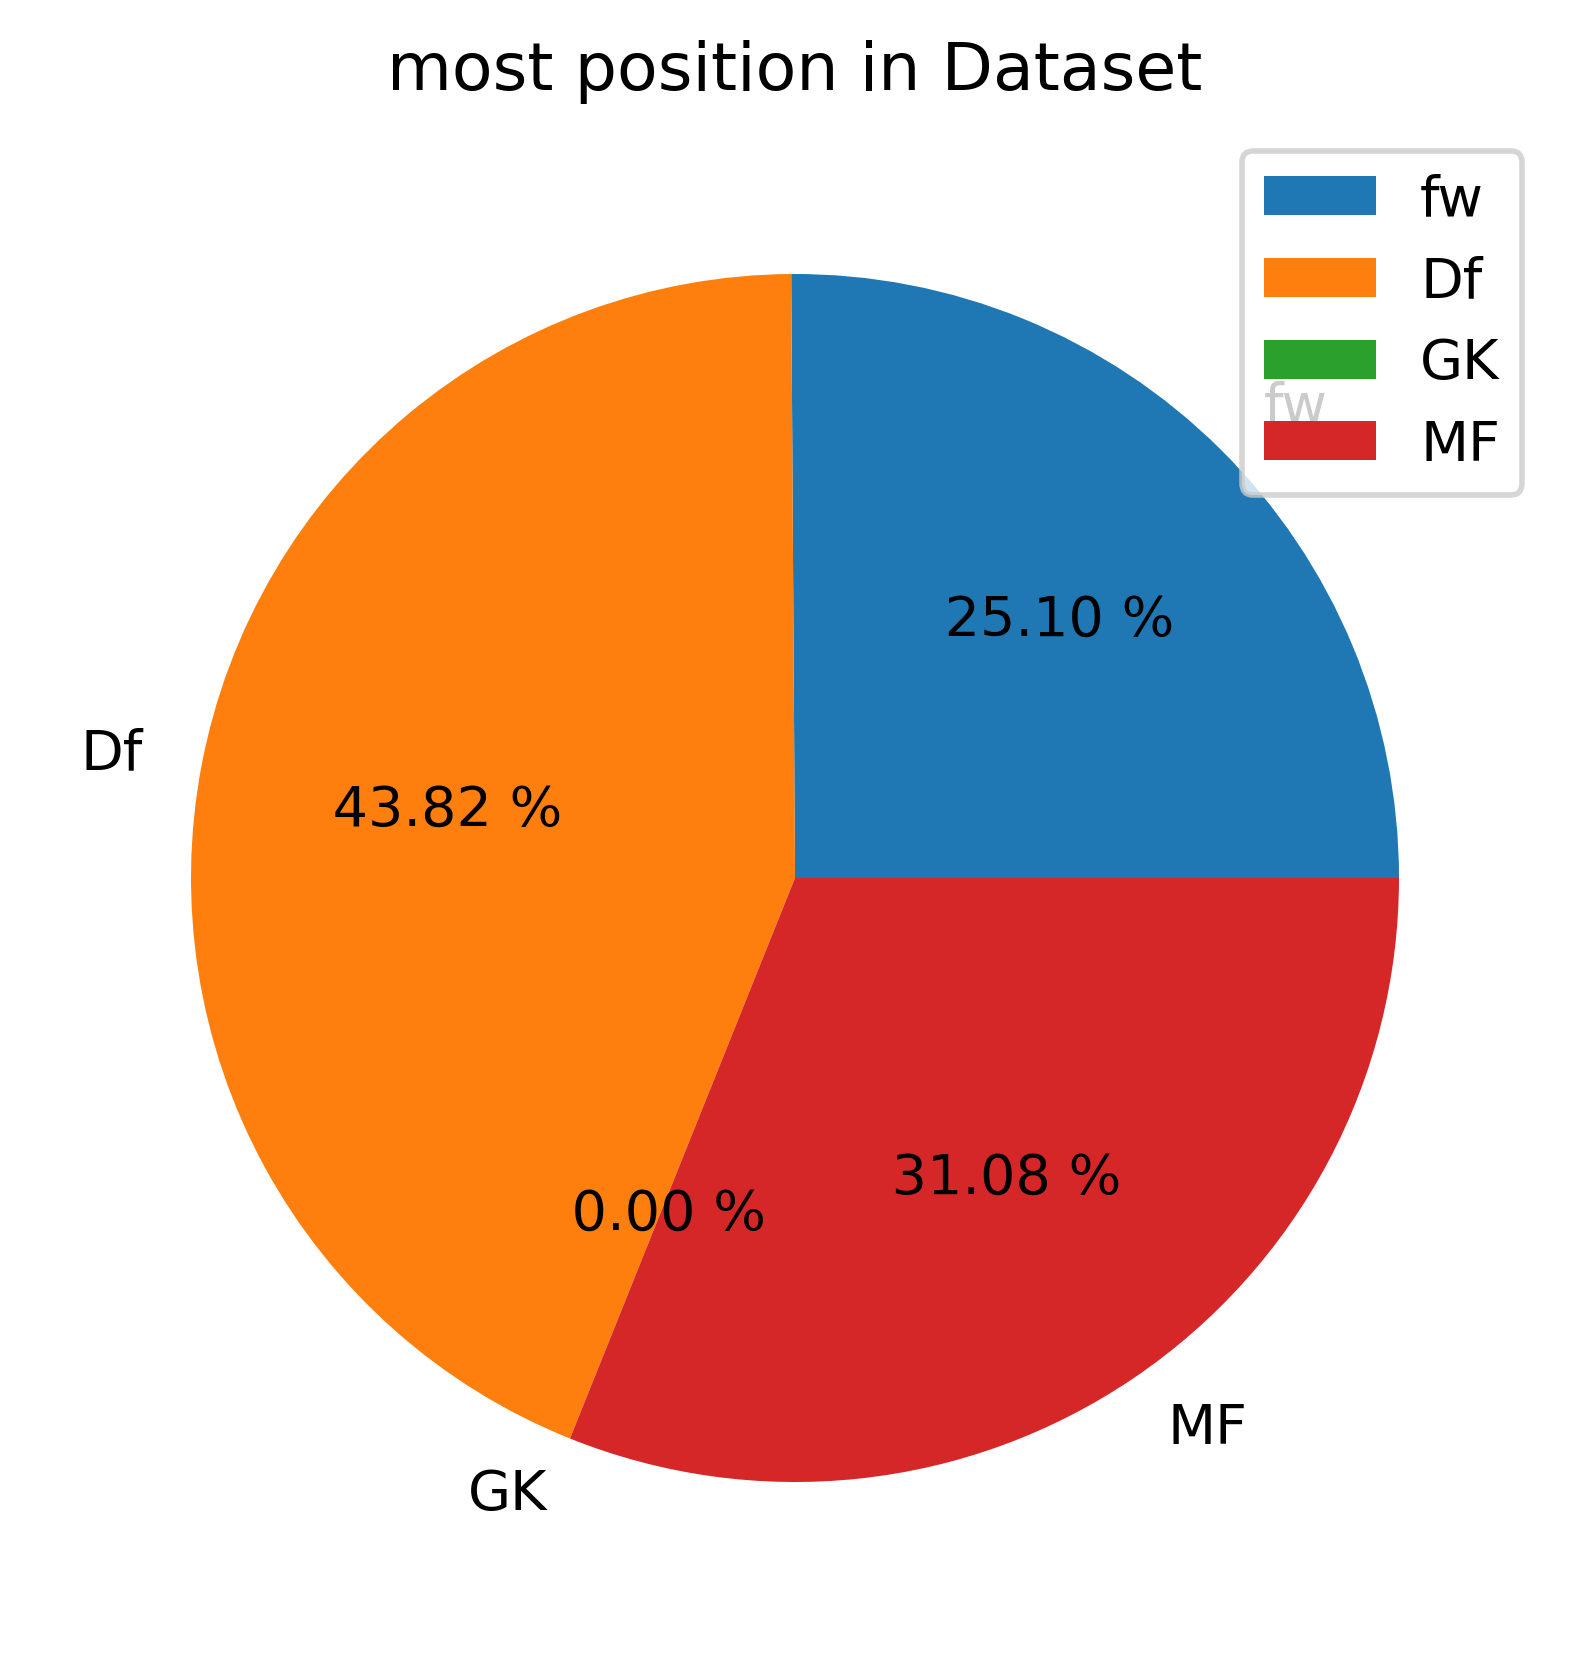

In [30]:
fw = df.loc[df['Pos'] == 'FW'].count()[0]
print(fw)
Df = df.loc[df['Pos'] == 'DF'].count()[0]
print(Df)

GK = df.loc[df['Pos'] == 'GK'].count()[0]
print(GK)

MF = df.loc[df['Pos'] == 'MF'].count()[0]
print(MF)

plt.figure(figsize=(8,5), dpi = 400)

plt.pie([fw, Df, GK, MF], labels = ['fw', 'Df','GK', 'MF'], autopct = "% .2f %%")

plt.title('most position in Dataset')

plt.legend()

plt.show()

<AxesSubplot:xlabel='count', ylabel='Nation'>

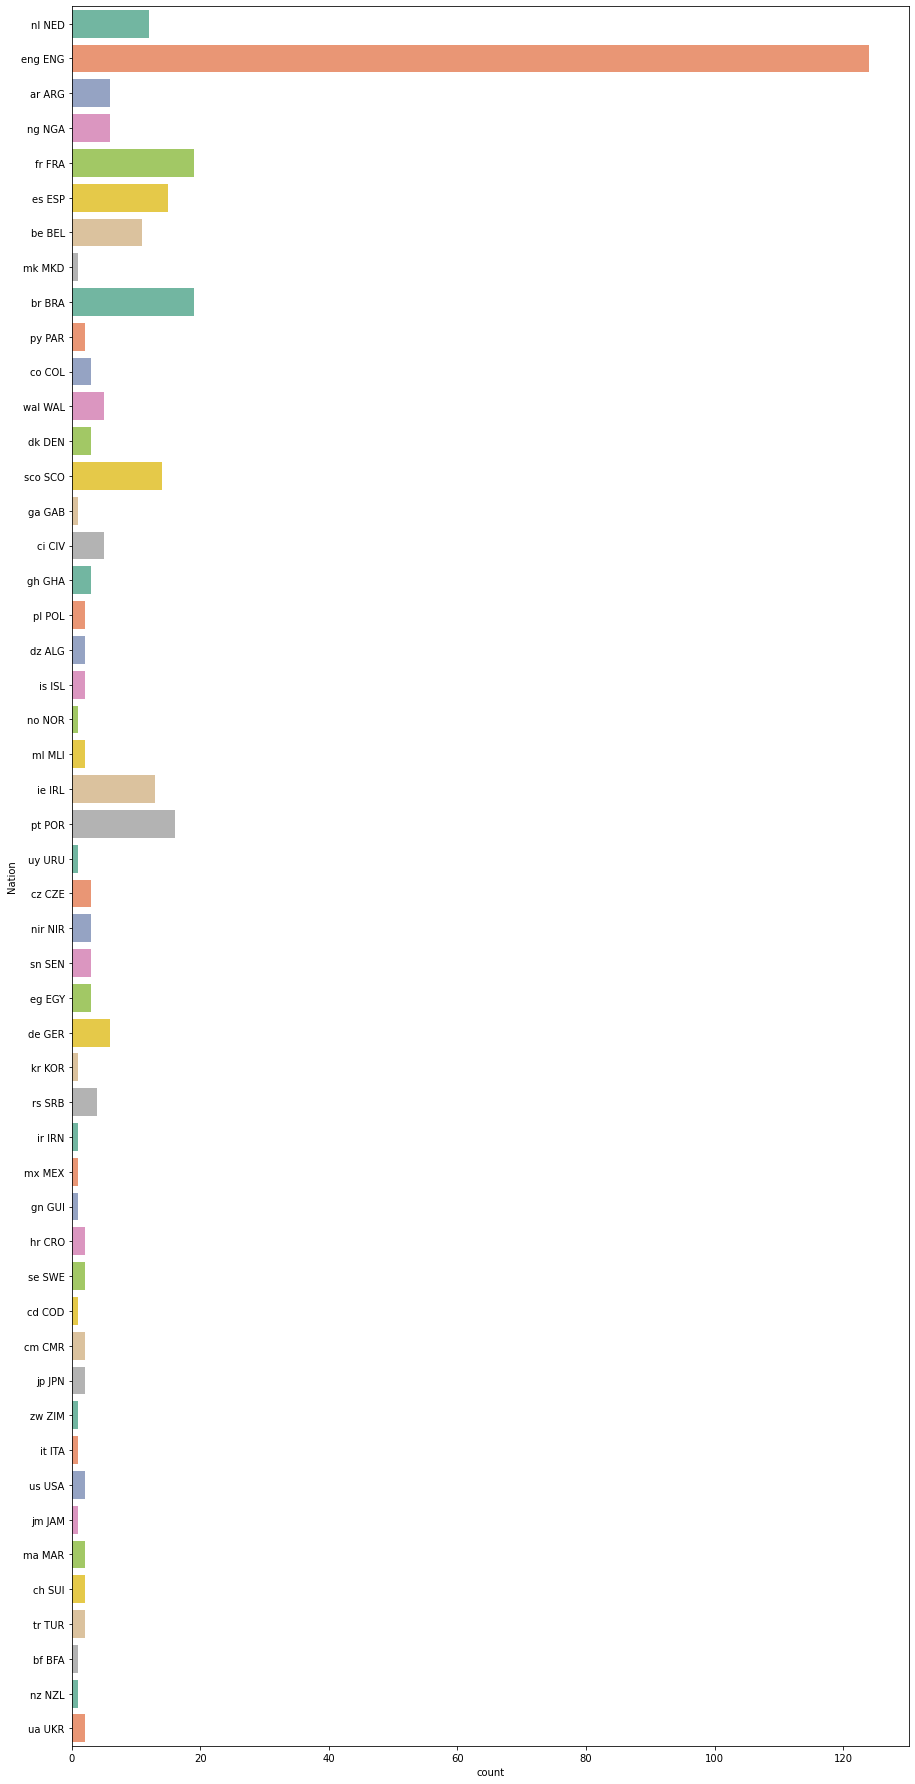

In [31]:
plt.figure(figsize=(15,32))
 
sns.countplot(y = df.Nation,palette="Set2")

<AxesSubplot:xlabel='Age', ylabel='count'>

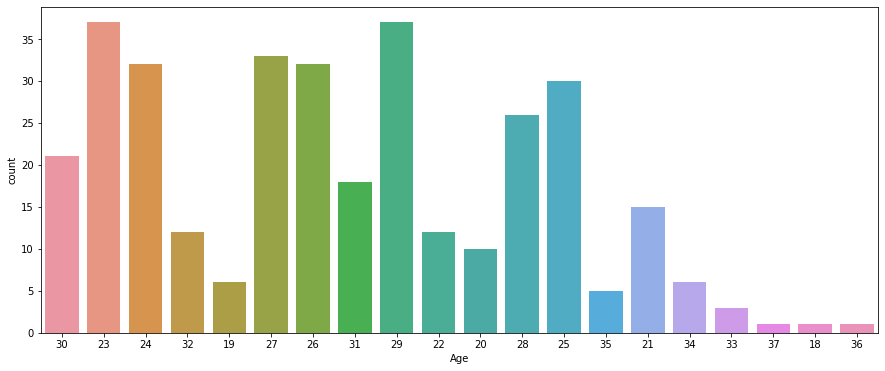

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=df)

C:\Users\Top\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Beast Score')

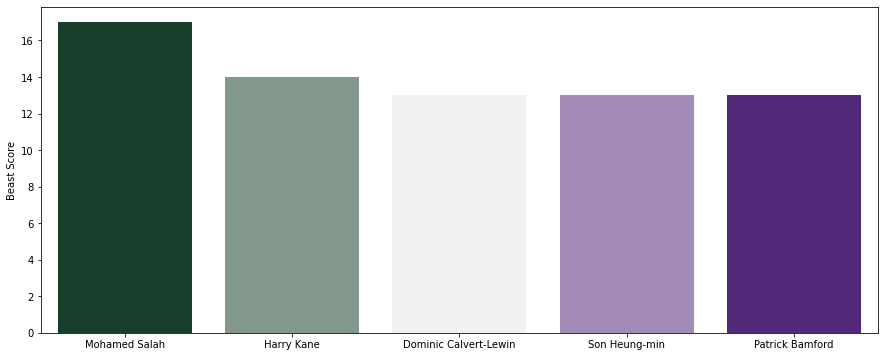

In [33]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Pos'] == 'FW') | (df['Pos'] == 'FWMF')].sort_values('Gls', ascending=False)[:5]
x2 = np.array(list(ss['Player']))
y2 = np.array(list(ss['Gls']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

In [51]:
df = pd.read_csv('radars.csv')
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,Andi Zeqiri\Andi-Zeqiri,ch SUI,FWDF,Brighton,21-253,1999,0.8,0,5,...,12.9,0,0,0,0.3,0.3,0.06,-0.3,-0.3,Matches
501,502,Oleksandr Zinchenko\Oleksandr-Zinchenko,ua UKR,DF,Manchester City,24-077,1996,10.1,0,8,...,21.1,0,0,0,0.4,0.4,0.06,-0.4,-0.4,Matches
502,503,Hakim Ziyech\Hakim-Ziyech,ma MAR,FWMF,Chelsea,27-348,1993,8.0,1,22,...,22.2,0,0,0,1.0,1.0,0.05,0.0,0.0,Matches
503,504,Kurt Zouma\Kurt-Zouma,fr FRA,DF,Chelsea,26-126,1994,16.0,4,15,...,10.8,0,0,0,1.0,1.0,0.07,3.0,3.0,Matches


In [52]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [53]:
df.Player.unique()

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Adrián', 'Sergio Agüero', 'Ola Aina',
       'Rayan Aït Nouri', 'Semi Ajayi', 'Nathan Aké', 'Marc Albrighton',
       'Thiago Alcántara', 'Toby Alderweireld', 'Rúnar Alex Rúnarsson',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Alisson', 'Allan',
       'Dele Alli', 'Miguel Almirón', 'Marcos Alonso', 'Steven Alzate',
       'Daniel Amartey', 'Ethan Ampadu', 'Joachim Andersen',
       'Elliot Anderson', 'Felipe Anderson', 'Michail Antonio',
       'Alphonse Areola', 'Stuart Armstrong', 'Kepa Arrizabalaga',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Charlie Austin',
       'Jordan Ayew', 'Luke Ayling', 'César Azpilicueta', 'Eric Bailly',
       'Fabián Balbuena', 'George Baldock', 'Gareth Bale',
       'Patrick Bamford', 'Phil Bardsley', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Donny van de Beek

In [54]:
df = df[(df['Player']=='Tammy Abraham') | (df['Player']=='Timo Werner')].reset_index()
df

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
1,481,482,Timo Werner,de GER,FW,Chelsea,24-361,1996,20.5,5,...,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches


In [55]:
df = df.drop(['index','Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches'],axis=1)
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Tammy Abraham,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,5.6,5.6,0.18,0.4,0.4
1,Timo Werner,5,55,21,38.2,2.69,1.03,0.09,0.24,13.7,8.4,8.4,0.15,-3.4,-3.4


In [56]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [57]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Tammy Abraham':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Timo Werner':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [58]:
values

[[6, 31, 13, 41.9, 2.73, 1.15, 0.19, 0.46, 9.9, 5.6, 5.6, 0.18, 0.4, 0.4],
 [5, 55, 21, 38.2, 2.69, 1.03, 0.09, 0.24, 13.7, 8.4, 8.4, 0.15, -3.4, -3.4]]

In [59]:
#title 

title = dict(
    title_name='Tammy Abraham',
    title_color = 'red',
    subtitle_name = 'Chelsea',
    subtitle_color = 'red',
    title_name_2='Timo Werner',
    title_color_2 = 'blue',
    subtitle_name_2 = 'Chelsea',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@yousef_Bozayed'

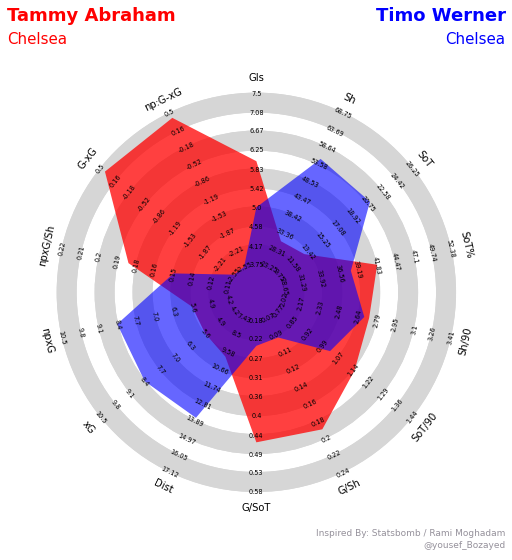

In [60]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)

In [7]:
df = pd.read_csv('radars.csv')
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,Andi Zeqiri\Andi-Zeqiri,ch SUI,FWDF,Brighton,21-253,1999,0.8,0,5,...,12.9,0,0,0,0.3,0.3,0.06,-0.3,-0.3,Matches
501,502,Oleksandr Zinchenko\Oleksandr-Zinchenko,ua UKR,DF,Manchester City,24-077,1996,10.1,0,8,...,21.1,0,0,0,0.4,0.4,0.06,-0.4,-0.4,Matches
502,503,Hakim Ziyech\Hakim-Ziyech,ma MAR,FWMF,Chelsea,27-348,1993,8.0,1,22,...,22.2,0,0,0,1.0,1.0,0.05,0.0,0.0,Matches
503,504,Kurt Zouma\Kurt-Zouma,fr FRA,DF,Chelsea,26-126,1994,16.0,4,15,...,10.8,0,0,0,1.0,1.0,0.07,3.0,3.0,Matches


In [8]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,Andi Zeqiri,ch SUI,FWDF,Brighton,21-253,1999,0.8,0,5,...,12.9,0,0,0,0.3,0.3,0.06,-0.3,-0.3,Matches
501,502,Oleksandr Zinchenko,ua UKR,DF,Manchester City,24-077,1996,10.1,0,8,...,21.1,0,0,0,0.4,0.4,0.06,-0.4,-0.4,Matches
502,503,Hakim Ziyech,ma MAR,FWMF,Chelsea,27-348,1993,8.0,1,22,...,22.2,0,0,0,1.0,1.0,0.05,0.0,0.0,Matches
503,504,Kurt Zouma,fr FRA,DF,Chelsea,26-126,1994,16.0,4,15,...,10.8,0,0,0,1.0,1.0,0.07,3.0,3.0,Matches


In [10]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches'],axis=1)
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Patrick van Aanholt,0,15,5,33.3,1.09,0.36,0.00,0.00,20.6,0.8,0.8,0.05,-0.8,-0.8
1,Tammy Abraham,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,5.6,5.6,0.18,0.4,0.4
2,Che Adams,4,40,18,45.0,1.89,0.85,0.10,0.22,13.5,5.3,5.3,0.13,-1.3,-1.3
3,Tosin Adarabioyo,0,17,4,23.5,0.77,0.18,0.00,0.00,9.0,0.9,0.9,0.06,-0.9,-0.9
4,Adrián,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Andi Zeqiri,0,5,0,0.0,6.62,0.00,0.00,NaN,12.9,0.3,0.3,0.06,-0.3,-0.3
501,Oleksandr Zinchenko,0,8,2,25.0,0.79,0.20,0.00,0.00,21.1,0.4,0.4,0.06,-0.4,-0.4
502,Hakim Ziyech,1,22,8,36.4,2.74,1.00,0.05,0.13,22.2,1.0,1.0,0.05,0.0,0.0
503,Kurt Zouma,4,15,8,53.3,0.94,0.50,0.27,0.50,10.8,1.0,1.0,0.07,3.0,3.0


In [11]:
params = list(df.columns)
print(params)
params = params[2:]

['Player', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']


In [16]:
player = df.loc[df['Player']=='Mohamed Salah'].reset_index()
player = list(player.loc[0])
print(player)

[398, 'Mohamed Salah', 17, 73, 30, 41.1, 3.13, 1.28, 0.15, 0.37, 16.1, 13.7, 9.2, 0.13, 3.3, 1.8]


In [12]:
df.Player.values

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Adrián', 'Sergio Agüero', 'Ola Aina',
       'Rayan Aït Nouri', 'Semi Ajayi', 'Nathan Aké', 'Marc Albrighton',
       'Thiago Alcántara', 'Toby Alderweireld', 'Rúnar Alex Rúnarsson',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Alisson', 'Allan',
       'Dele Alli', 'Miguel Almirón', 'Marcos Alonso', 'Steven Alzate',
       'Daniel Amartey', 'Ethan Ampadu', 'Joachim Andersen',
       'Elliot Anderson', 'Felipe Anderson', 'Michail Antonio',
       'Alphonse Areola', 'Stuart Armstrong', 'Kepa Arrizabalaga',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Charlie Austin',
       'Jordan Ayew', 'Luke Ayling', 'César Azpilicueta', 'Eric Bailly',
       'Fabián Balbuena', 'George Baldock', 'Gareth Bale',
       'Patrick Bamford', 'Phil Bardsley', 'Ross Barkley', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'D

In [17]:
# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

13
16 None
13
13 None


In [18]:
# now that we have the player scores, we need to calculate the percentile values with scipy stats.
# I am doing this because I do not know the percentile beforehand and only have the raw numbers
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [19]:
round(stats.percentileofscore(df[params[0]],player[0]))

99

In [21]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [22]:
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

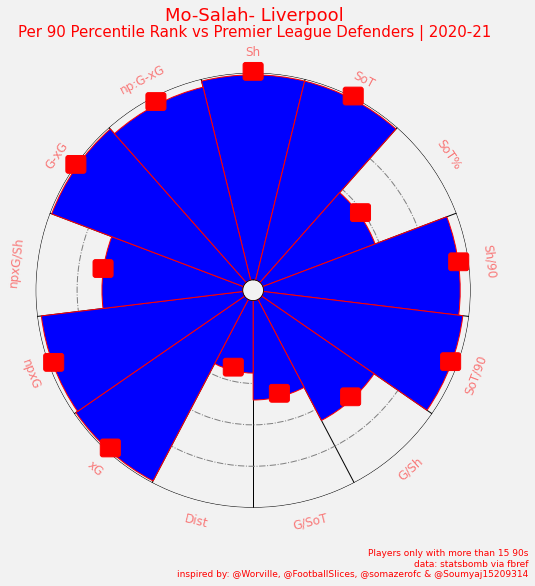

In [32]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="Blue", edgecolor="Red",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="Red", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="Red", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="Red", facecolor="Red",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Mo-Salah- Liverpool", size=18,
    ha="center", color="Red"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs Premier League Defenders | 2020-21",
    size=15,
    ha="center", color="Red"
)

# add credits
fig.text(
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}", size=9,
    color="Red",
    ha="right"
)

plt.savefig('pizza.png',dpi=500,bbox_inches = 'tight')